In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\mayur\Downloads\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Checking missing values

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data = df.drop_duplicates(subset ="Species",)
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [8]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

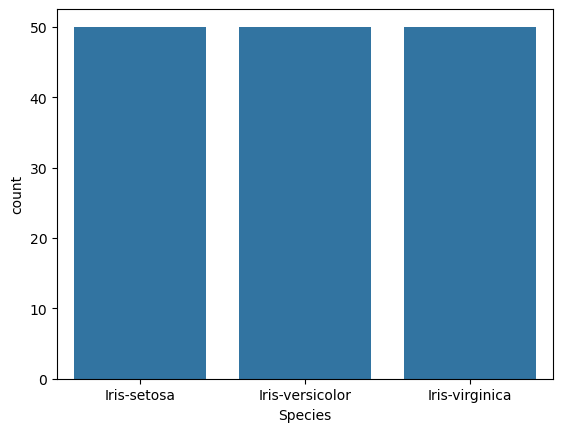

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='Species', data=df, )
plt.show()

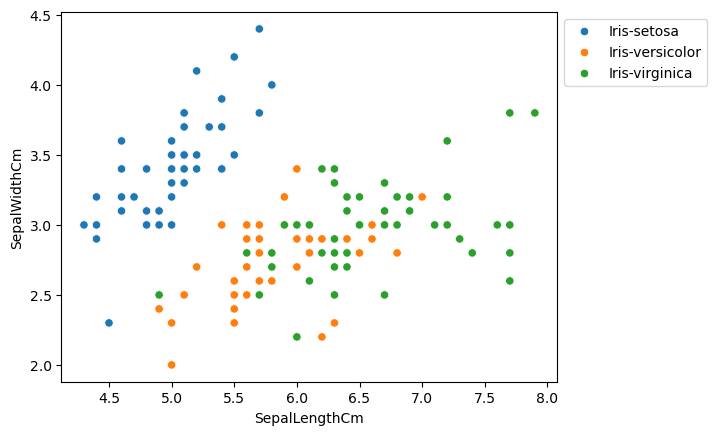

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

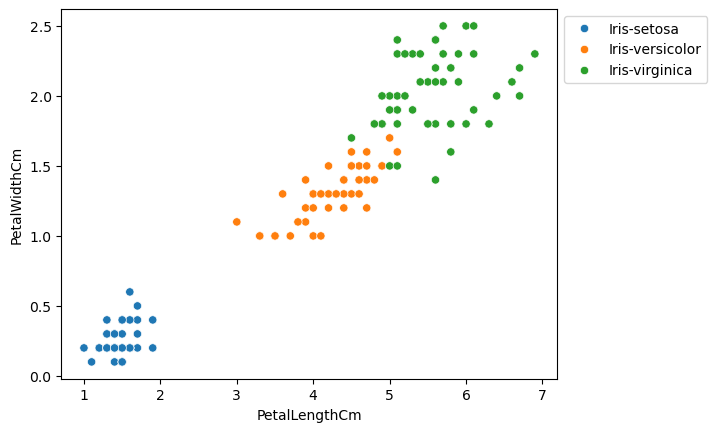

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

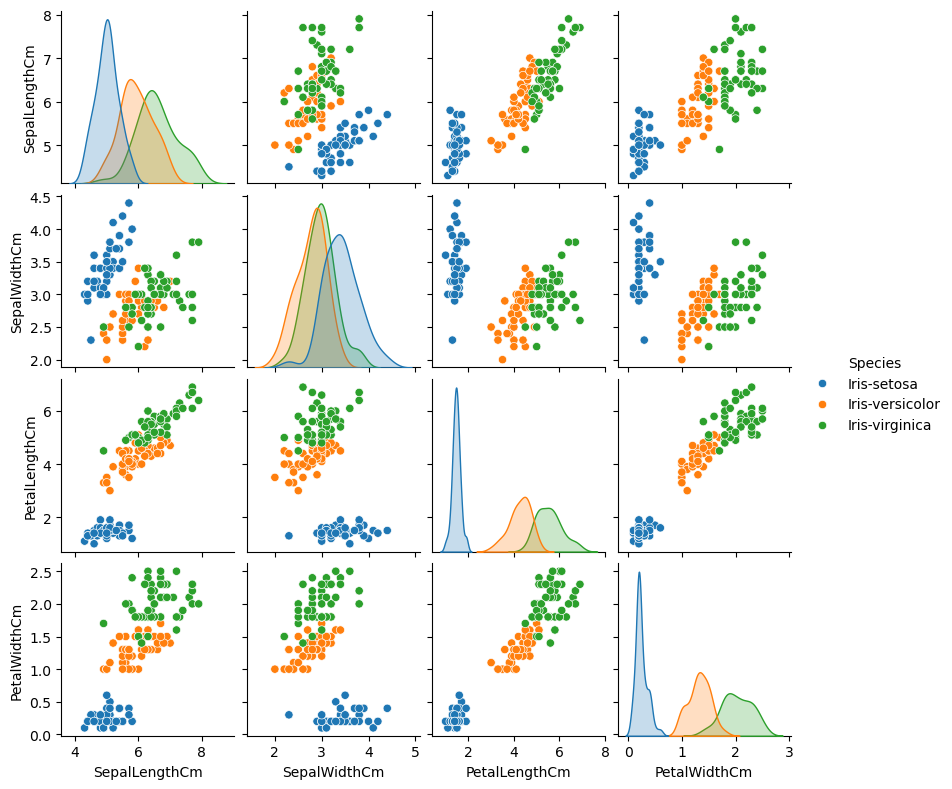

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df.drop(['Id'], axis = 1), 
             hue='Species', height=2)

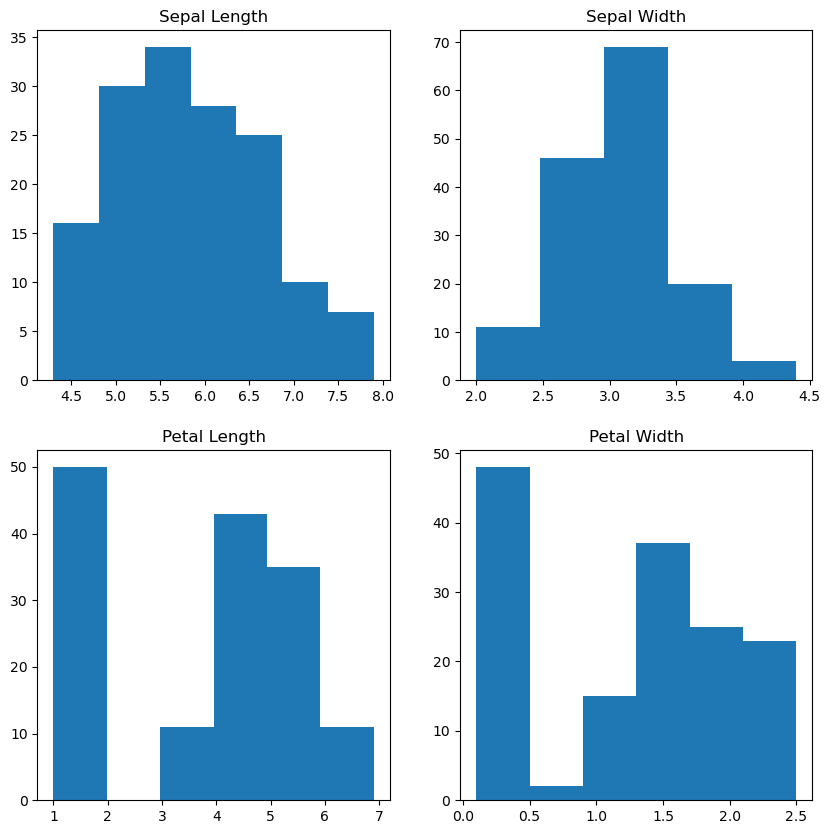

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

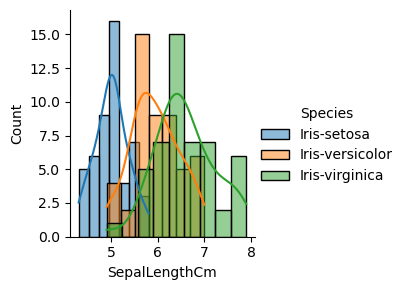

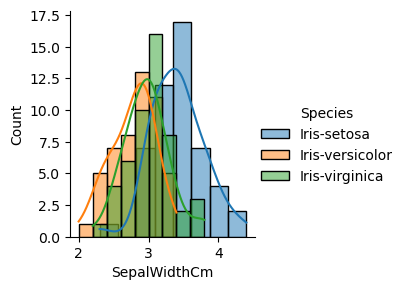

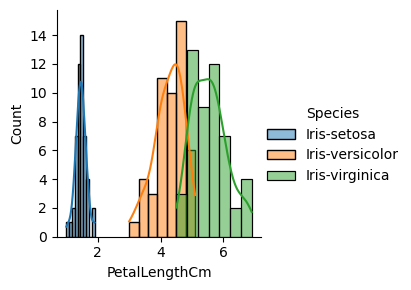

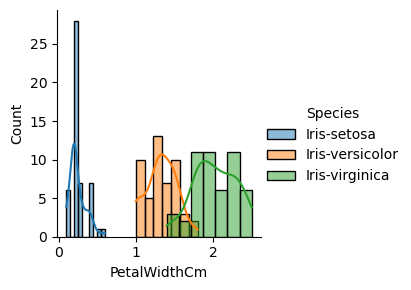

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sepal Length
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalLengthCm", kde=True)
plot.add_legend()

# Sepal Width
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "SepalWidthCm", kde=True)
plot.add_legend()

# Petal Length
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalLengthCm", kde=True)
plot.add_legend()

# Petal Width
plot = sns.FacetGrid(df, hue="Species")
plot.map(sns.histplot, "PetalWidthCm", kde=True)
plot.add_legend()

plt.show()


In [15]:
data.select_dtypes(include=['number']).corr(method='pearson')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.624413,-0.654654,0.969909,0.999685
SepalLengthCm,0.624413,1.000000,-0.999226,0.795795,0.643817
SepalWidthCm,-0.654654,-0.999226,1.000000,-0.818999,-0.673417
PetalLengthCm,0.969909,0.795795,-0.818999,1.000000,0.975713
PetalWidthCm,0.999685,0.643817,-0.673417,0.975713,1.000000


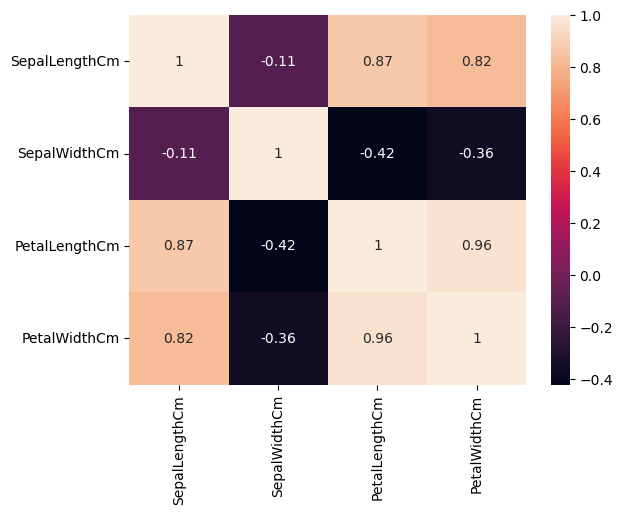

In [16]:
import seaborn as sns 
import matplotlib.pyplot as plt 


sns.heatmap(df.select_dtypes(include=['number']).corr(method='pearson').drop( 
['Id'], axis=1).drop(['Id'], axis=0), 
			annot = True); 

plt.show()


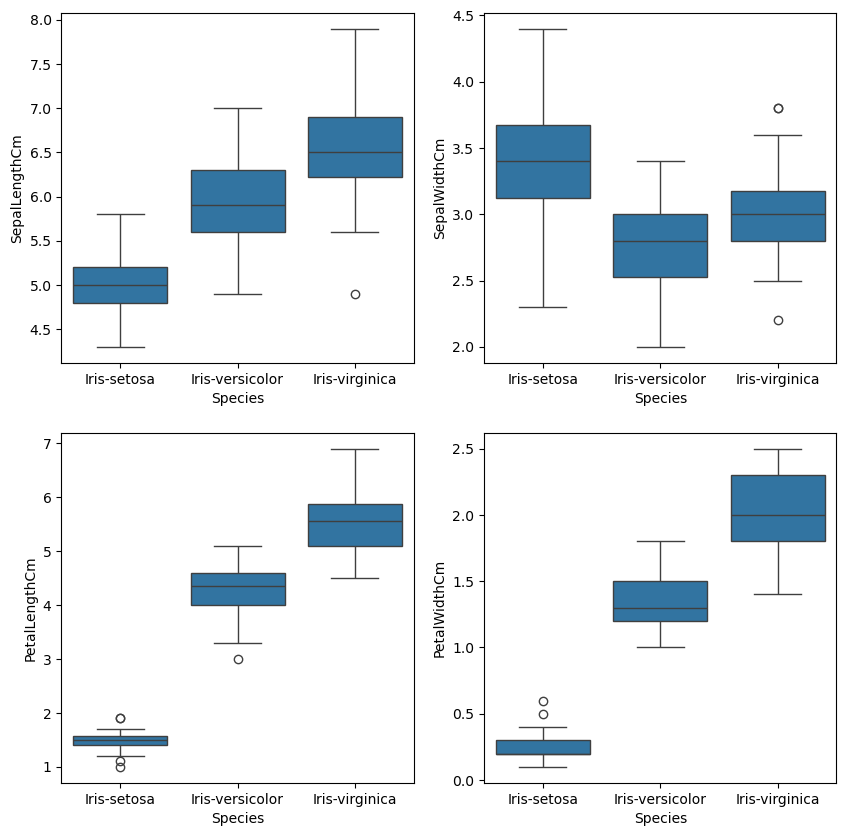

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))
    
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

<Axes: xlabel='SepalWidthCm'>

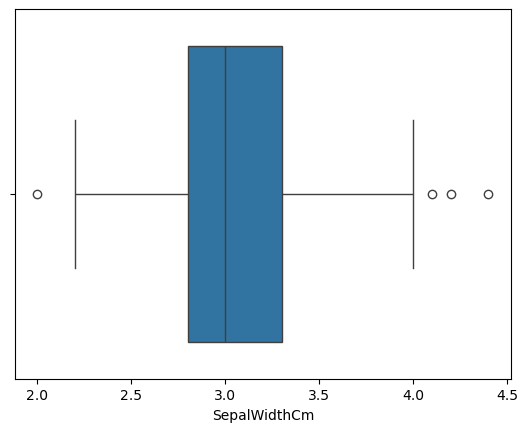

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\mayur\Downloads\Iris (1).csv")

sns.boxplot(x='SepalWidthCm', data=df)

Old Shape:  (150, 6)
New Shape:  (146, 6)


<Axes: xlabel='SepalWidthCm'>

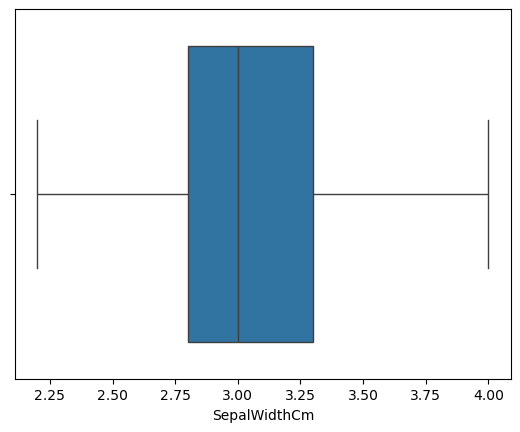

In [19]:
# Importing
import numpy as np

# Load the dataset 
df = pd.read_csv(r"C:\Users\mayur\Downloads\Iris (1).csv") 

# IQR 
Q1 = np.percentile(df['SepalWidthCm'], 25, 
				interpolation = 'midpoint') 

Q3 = np.percentile(df['SepalWidthCm'], 75, 
				interpolation = 'midpoint') 
IQR = Q3 - Q1 

print("Old Shape: ", df.shape) 

# Upper bound 
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR)) 

# Lower bound 
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR)) 

# Removing the Outliers 
df.drop(upper[0], inplace = True) 
df.drop(lower[0], inplace = True) 

print("New Shape: ", df.shape) 

sns.boxplot(x='SepalWidthCm', data=df)

# This code is modified by Susobhan Akhuli